# My Convex Hull

In [110]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Menghitung Jarak antara titik a dan b pada koordinat
def pythagoras(a,b):
    return math.sqrt(a**2+b**2)

# Menghitung jarak antara titik x0, y0 dengan garis yang dibentuk oleh dua titik x1,y1 dan x2,y2
def distanceBtwnLineAndPoint(x1,y1,x2,y2,x0,y0):
    return abs((x2-x1)*(y1-y0) - (x1-x0)*(y2-y1)) / np.sqrt(np.square(x2-x1) + np.square(y2-y1))

# Menghitung besar sudut yang dibentuk oleh titik B(x,y) A(x,y) C(x3,y3) dengan vertex A(x,y)
def lawOfCosines(Ax,Ay,Bx,By,Cx,Cy):
    p12 = pythagoras(Ax-Bx,Ay-By)
    p13 = pythagoras(Ax-Cx,Ay-Cy) 
    p23 = pythagoras(Bx-Cx,By-Cy)
    return math.degrees(math.acos((p12**2 + p13**2 - p23**2) / (2*p12*p13)))
            
# Kelas myConvexHull
# Mengandung method yang digunakan untuk menentukan titik mana saja pada atribut item yang merupakan 
# bagian dari convex hull.
class myConvexHull:
    def __init__(self, myPoints):
        self.myPoints = myPoints[np.lexsort((myPoints[:,1],myPoints[:,0]))]
        self.convexHullRelation = []
        distance = 0.0
        p1 = -1
        p2 = -1
        for i in range (self.myPoints.shape[0]):
            for j in range (i+1,len(self.myPoints)):
                currentDistance = pythagoras(self.myPoints[j][0] - self.myPoints[i][0], self.myPoints[j][1] - self.myPoints[i][1])
                if (currentDistance > distance):
                    distance = currentDistance
                    p1 = i
                    p2 = j

        topCandidate = []
        bottomCandidate = []
        x1 = self.myPoints[p1][0] ; y1 = self.myPoints[p1][1]
        x2 = self.myPoints[p2][0] ; y2 = self.myPoints[p2][1]
        for i in range (self.myPoints.shape[0]):
            x3 = self.myPoints[i][0] ; y3 = self.myPoints[i][1]
            tempMatrix = np.array([[x1,y1,1],
                                   [x2,y2,1],
                                   [x3,y3,1]])
            detTempMatrix = np.linalg.det(tempMatrix)
            if (detTempMatrix > 0):
                topCandidate.append(i)
            elif (detTempMatrix < 0):
                bottomCandidate.append(i)
        self.DnC(p1,p2,topCandidate)
        self.DnC(p2,p1,bottomCandidate)

    def DnC(self,point1, point2,candidateSet):
        
        topCandidate = []
        x1 = self.myPoints[int(point1)][0] ; y1 = self.myPoints[int(point1)][1]
        x2 = self.myPoints[int(point2)][0] ; y2 = self.myPoints[int(point2)][1]
        farthestDistance = -1
        farthestPoint = -1
        for i in candidateSet:
            if (i != point1 and i!= point2 and i != farthestPoint):
                x3 = self.myPoints[i][0] ; y3 = self.myPoints[i][1]
                tempMatrix = np.array([[x1,y1,1],
                                    [x2,y2,1],
                                    [x3,y3,1]])
                detTempMatrix = np.linalg.det(tempMatrix)
                if (detTempMatrix > 0):
                    topCandidate.append(i)
                    tempDistance = distanceBtwnLineAndPoint(x1,y1,x2,y2,x3,y3)
                    if (tempDistance > farthestDistance):
                        farthestDistance = tempDistance
                        farthestPoint = i
                    elif (tempDistance == farthestDistance and (x3 != self.myPoints[farthestPoint][0] and y3 != self.myPoints[farthestPoint][1])):
                        tempAngle = lawOfCosines(x1,y1,x3,y3,x2,y2)
                        farthestAngel = lawOfCosines(x1,y1,self.myPoints[farthestPoint][0], self.myPoints[farthestPoint][1],x2,y2)
                        if (tempAngle > farthestAngel):
                            farthestDistance = tempDistance
                            farthestPoint = i
                        
        if (farthestPoint == -1):
            self.convexHullRelation.append([int(point1),int(point2)])
        else:
            self.DnC(int(point1),farthestPoint,topCandidate)
            self.DnC(farthestPoint,int(point2),topCandidate)


In [111]:
import pandas as pd
import matplotlib.pyplot as plt 
import random
from sklearn import datasets

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range(100)]

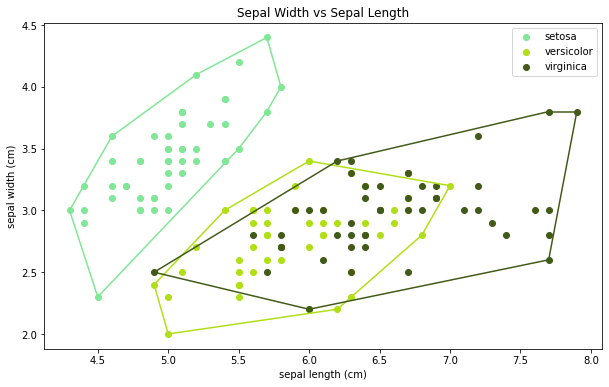

In [112]:
# Load Dataset
dataIris = datasets.load_iris()
df = pd.DataFrame(dataIris.data, columns=dataIris.feature_names)
df['Target'] = pd.DataFrame(dataIris.target)

# Plot
plt.figure(figsize = (10, 6))
plt.title('Sepal Width vs Sepal Length')
plt.xlabel(dataIris.feature_names[0])
plt.ylabel(dataIris.feature_names[1])
for i in range(len(dataIris.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket)
    plt.scatter(hull.myPoints[:, 0], hull.myPoints[:, 1], label=dataIris.target_names[i], color=colors[i])
    for simplex in hull.convexHullRelation:
        plt.plot(hull.myPoints[simplex, 0], hull.myPoints[simplex, 1], colors[i])
plt.legend()


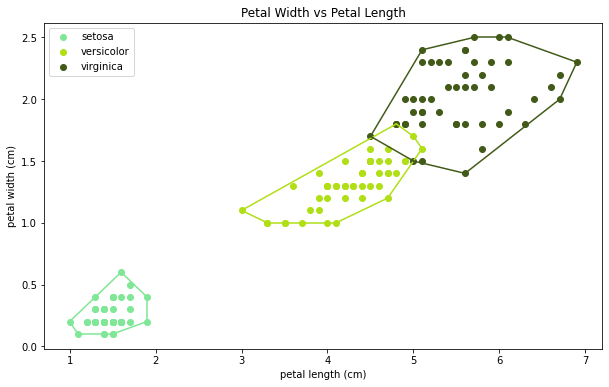

In [113]:
# Plot
plt.figure(figsize = (10, 6))
plt.title('Petal Width vs Petal Length')
plt.xlabel(dataIris.feature_names[2])
plt.ylabel(dataIris.feature_names[3])
for i in range(len(dataIris.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    hull = myConvexHull(bucket)
    plt.scatter(hull.myPoints[:, 0], hull.myPoints[:, 1], label=dataIris.target_names[i], color=colors[i])
    for simplex in hull.convexHullRelation:
        plt.plot(hull.myPoints[simplex, 0], hull.myPoints[simplex, 1], colors[i])
plt.legend()

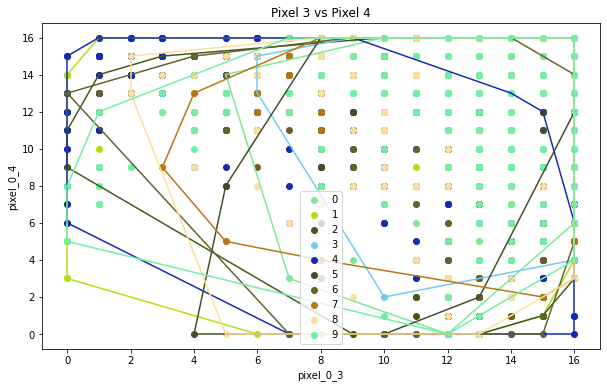

In [114]:
# Load dataset
dataDigits = datasets.load_digits()
df = pd.DataFrame(dataDigits.data, columns=dataDigits.feature_names)
df['Target'] = pd.DataFrame(dataDigits.target)

# Plot
plt.figure(figsize = (10, 6))
plt.title('Pixel 3 vs Pixel 4')
plt.xlabel(dataDigits.feature_names[3])
plt.ylabel(dataDigits.feature_names[4])
for i in range(len(dataDigits.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[3,4]].values
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=dataDigits.target_names[i], color=colors[i])
    for simplex in hull.convexHullRelation:
        plt.plot(hull.myPoints[simplex, 0], hull.myPoints[simplex, 1], colors[i])
plt.legend()

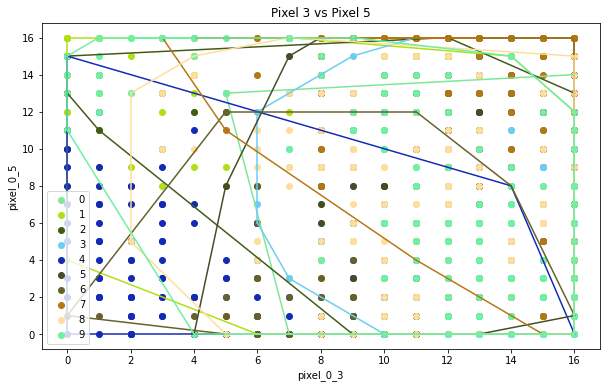

In [115]:
# Plot
dataDigits = datasets.load_digits()
df = pd.DataFrame(dataDigits.data, columns=dataDigits.feature_names)
df['Target'] = pd.DataFrame(dataDigits.target)
plt.figure(figsize = (10, 6))
plt.title('Pixel 3 vs Pixel 5')
plt.xlabel(dataDigits.feature_names[3])
plt.ylabel(dataDigits.feature_names[5])
for i in range(len(dataDigits.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[3,5]].values
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=dataDigits.target_names[i], color=colors[i])
    for simplex in hull.convexHullRelation:
        plt.plot(hull.myPoints[simplex, 0], hull.myPoints[simplex, 1], colors[i])
plt.legend()

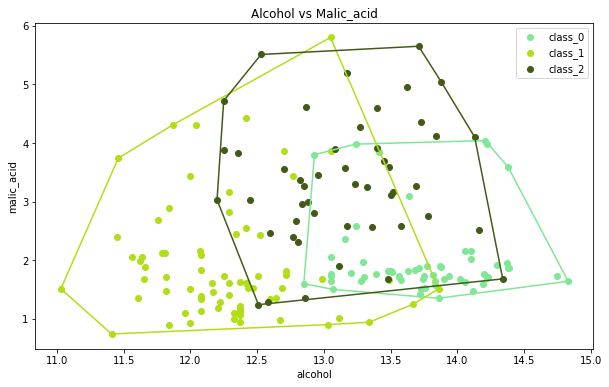

In [120]:
# Load Dataset
dataWine = datasets.load_wine()
df = pd.DataFrame(dataWine.data, columns=dataWine.feature_names)
df['Target'] = pd.DataFrame(dataWine.target)

# Plot
plt.figure(figsize = (10, 6))
plt.title('Alcohol vs Malic_acid')
plt.xlabel(dataWine.feature_names[0])
plt.ylabel(dataWine.feature_names[1])
for i in range(len(dataWine.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=dataWine.target_names[i], color=colors[i])
    for simplex in hull.convexHullRelation:
        plt.plot(hull.myPoints[simplex, 0], hull.myPoints[simplex, 1], colors[i])
plt.legend()


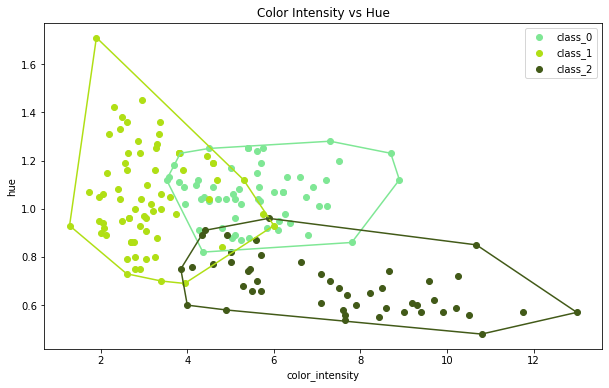

In [121]:
# Plot
plt.figure(figsize = (10, 6))
plt.title('Color Intensity vs Hue')
plt.xlabel(dataWine.feature_names[9])
plt.ylabel(dataWine.feature_names[10])
for i in range(len(dataWine.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[9,10]].values
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=dataWine.target_names[i], color=colors[i])
    for simplex in hull.convexHullRelation:
        plt.plot(hull.myPoints[simplex, 0], hull.myPoints[simplex, 1], colors[i])
plt.legend()

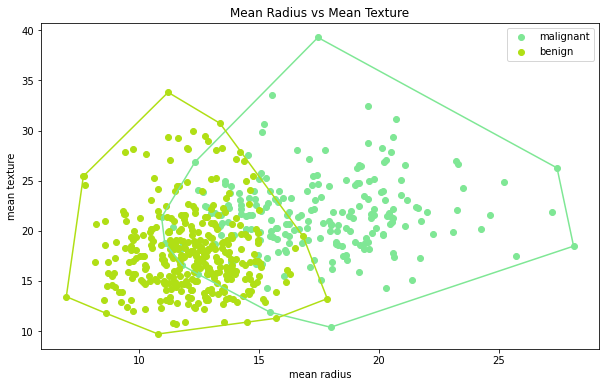

In [122]:
# Load Dataset
dataBreast = datasets.load_breast_cancer()
df = pd.DataFrame(dataBreast.data, columns=dataBreast.feature_names)
df['Target'] = pd.DataFrame(dataBreast.target)

# Plot
plt.figure(figsize = (10, 6))
plt.title('Mean Radius vs Mean Texture')
plt.xlabel(dataBreast.feature_names[0])
plt.ylabel(dataBreast.feature_names[1])
for i in range(len(dataBreast.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=dataBreast.target_names[i], color=colors[i])
    for simplex in hull.convexHullRelation:
        plt.plot(hull.myPoints[simplex, 0], hull.myPoints[simplex, 1], colors[i])
plt.legend()

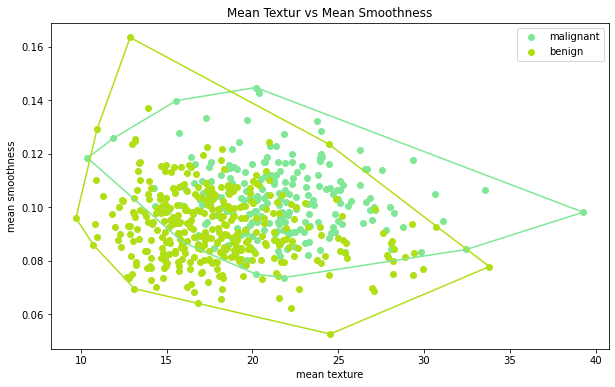

In [119]:
# Plot
plt.figure(figsize = (10, 6))
plt.title('Mean Textur vs Mean Smoothness')
plt.xlabel(dataBreast.feature_names[1])
plt.ylabel(dataBreast.feature_names[4])
for i in range(len(dataBreast.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[1,4]].values
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=dataBreast.target_names[i], color=colors[i])
    for simplex in hull.convexHullRelation:
        plt.plot(hull.myPoints[simplex, 0], hull.myPoints[simplex, 1], colors[i])
plt.legend()